In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline

In [6]:
import argparse
import xml.etree.ElementTree as ET
import os

parser = argparse.ArgumentParser(description='Build Annotations.')
parser.add_argument('dir', default='..', help='Annotations.')

sets = [('2007', 'train'), ('2007', 'val'), ('2007', 'test')]

classes_num = {'aeroplane': 0, 'bicycle': 1, 'bird': 2, 'boat': 3, 'bottle': 4, 'bus': 5,
               'car': 6, 'cat': 7, 'chair': 8, 'cow': 9, 'diningtable': 10, 'dog': 11,
               'horse': 12, 'motorbike': 13, 'person': 14, 'pottedplant': 15, 'sheep': 16,
               'sofa': 17, 'train': 18, 'tvmonitor': 19}


def convert_annotation(year, image_id, f):
    in_file = os.path.join('VOCdevkit/VOC%s/Annotations/%s.xml' % (year, image_id))
    tree = ET.parse(in_file)
    root = tree.getroot()

    for obj in root.iter('object'):
        difficult = obj.find('difficult').text
        cls = obj.find('name').text
        classes = list(classes_num.keys())
        if cls not in classes or int(difficult) == 1:
            continue
        cls_id = classes.index(cls)
        xmlbox = obj.find('bndbox')
        b = (int(xmlbox.find('xmin').text), int(xmlbox.find('ymin').text),
             int(xmlbox.find('xmax').text), int(xmlbox.find('ymax').text))
        f.write(' ' + ','.join([str(a) for a in b]) + ',' + str(cls_id))

In [8]:
for year, image_set in sets:
    print(year, image_set)
    with open(os.path.join('VOCdevkit/VOC%s/ImageSets/Main/%s.txt' % (year, image_set)), 'r') as f:
        image_ids = f.read().strip().split()
    with open(os.path.join("VOCdevkit", '%s_%s.txt' % (year, image_set)), 'w') as f:
        for image_id in image_ids:
            f.write('%s/VOC%s/JPEGImages/%s.jpg' % ("VOCdevkit", year, image_id))
            convert_annotation(year, image_id, f)
            f.write('\n')

2007 train
2007 val
2007 test


In [12]:
import cv2
import numpy as np

def read(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    return image

(333, 500, 3)


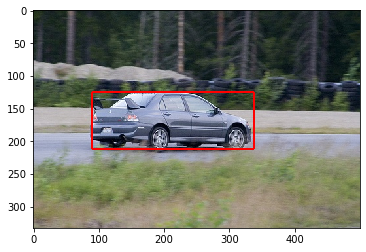

In [14]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# read an image
image = cv2.imread('VOCdevkit/VOC2007/JPEGImages/000026.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)

# draw bounding boxes
color = (255, 0, 0)
thickness = 2
image = cv2.rectangle(image, (90,125), (337,212),  color, thickness)

# plot image
fig = plt.figure()
plt.imshow(image/255.0)